Complete this exercise by
filling in 
 `# YOUR ANSWER HERE`
 in the cell below `# Vectorized gradient`.

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2]


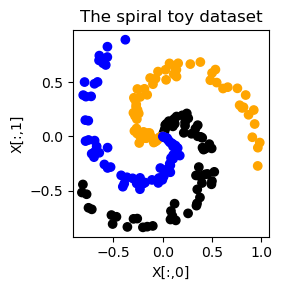

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def make_spirals(n_points=500, n_classes=3, noise=0.2):
    X = []
    y = []
    points_per_class = n_points // n_classes
    
    for j in range(n_classes):
        ix = range(points_per_class * j, points_per_class * (j + 1))
        r = np.linspace(0.0, 1, points_per_class)  # radius
        t = np.linspace(j * 4, (j + 1) * 4, points_per_class) + np.random.randn(points_per_class) * noise
        X.append(np.c_[r * np.sin(t), r * np.cos(t)])
        y.append(np.full(points_per_class, j))
    
    X = np.vstack(X)
    y = np.hstack(y)
    return X, y

classId2RGBA = lambda x: [
    (0, 0, 0, decision_region_alpha),           # black
    (255/255, 165/255, 0, decision_region_alpha),  # orange
    (0, 0, 255/255, decision_region_alpha)      # blue
][x]
classId2Color = lambda x : ['black','orange','blue'][x]


X,y = make_spirals(200, 3, 0.2)
X.shape # (198, 2) = (num_samples, num_features)
print(y) # [0 0 ... 1 1 ... 2 2 ... 2]

plt.figure(figsize=(3,3))
plt.scatter(X[:,0], X[:,1], color = list(map(classId2Color, y)))
plt.xlabel("X[:,0]")
plt.ylabel("X[:,1]")
plt.title("The spiral toy dataset")
plt.tight_layout()
plt.savefig("spiral.pdf")


In [2]:
def plot_decision_region(model, X, y):
    classId2Color = lambda x : ['black','orange','blue'][x]
    plt.scatter(X[:,0], X[:,1], marker = '.', color = list(map(classId2Color, y)))
    ax = plt.gca()
    xmin, xmax = ax.get_xlim()
    ymin, ymax = ax.get_ylim()
    grid_size = 100
    X1grid, X2grid = np.meshgrid(np.linspace(-1,1,grid_size), np.linspace(-1,1,grid_size))
    Xgrid = np.vstack([X1grid.flatten(), X2grid.flatten()]).T
    ygrid = np.argmax(model(Xgrid), axis=-1)
    
    decision_region_alpha = 0.25
    classId2RGBA = lambda x: [
        (0, 0, 0, decision_region_alpha),         # black
        (255/255, 165/255, 0, decision_region_alpha),     # orange
        (0, 0, 255/255,decision_region_alpha)        # blue
    ][x]
    
    ygrid_rgba_image = np.array(list(map(classId2RGBA,ygrid))).reshape(grid_size,grid_size, -1)
    plt.imshow(ygrid_rgba_image, origin='lower', extent=(xmin,xmax, ymin,ymax))

In [3]:
num_hidden = 32
W1 = np.random.randn(2,num_hidden)
b1 = np.random.randn(num_hidden)
W2 = np.random.randn(num_hidden,3)
b2 = np.random.randn(3)



z1 = X@W1+b1

relu = lambda x : np.maximum(x,0)
h1 = relu(z1)

logits_method2 = h1@W2 + b2

logits_method2[:3,:]

array([[ 0.20560871, -3.61466565, -4.88273328],
       [ 0.1953316 , -3.63935283, -4.93257754],
       [ 0.18731032, -3.66298845, -4.99054178]])

In [4]:
logits_list = []
for i in range(X.shape[0]):
    logits_list.append(relu(X[i,:] @ W1  + b1) @ W2 + b2)
logits_method1 = np.vstack(logits_list)
logits_method1[:3,:]

array([[ 0.20560871, -3.61466565, -4.88273328],
       [ 0.1953316 , -3.63935283, -4.93257754],
       [ 0.18731032, -3.66298845, -4.99054178]])

In [5]:
A = np.array([[1, 2],
              [3, 4]])
B = np.array([[5, 6, 7],
              [8, 9, 10]])
C = np.zeros((2,3))
for i in range(2):
    C += np.outer(A[:,i], B[i,:])
    
assert(np.allclose( A @ B, C))

In [13]:

class OneLayerNN:
    def __init__(self, num_hidden,rng_seed):
        np.random.seed(rng_seed)
        self.W1 = np.random.randn(2,num_hidden)
        self.b1 = np.random.randn(num_hidden)
        self.W2 = np.random.randn(num_hidden,3)
        self.b2 = np.random.randn(3)
    def forward(self,X):
        self.z1 = X@self.W1+self.b1
        
        relu = lambda x : np.maximum(x,0)
        self.h1 = relu(self.z1)
        
        return self.h1@self.W2 + self.b2
    def __call__(self,X):
        return self.forward(X)

# objective
def J(logits, y):
    return np.mean(-np.log(np.exp(logits[np.arange(len(y)),y]) / np.sum(np.exp(logits), axis=-1)))

def softmax(logits):
    expvals = np.exp(logits)
    return expvals / expvals.sum(axis=1, keepdims=True)

import pdb
def J_grads(model, X, y):
    """
    Returns (dJdW1, dJdb1, dJdW2, dJdb2)
    """
    N = X.shape[0]
    logits = model.forward(X)
    
    dJdb2 = np.zeros_like(model.b2)
    dJdW2 = np.zeros_like(model.W2)
    dJdb1 = np.zeros_like(model.b1)
    dJdW1 = np.zeros_like(model.W1)
    
    for i in range(X.shape[0]):
        dJdz2 = np.exp(logits[i,:]) / np.sum( np.exp(logits[i,:]) )
        dJdz2[y[i]] -= 1
        
        dJdb2 += dJdz2
        dJdW2 += np.outer(model.h1[i,:], dJdz2)
        dJdb1 += (model.z1[i,:] > 0) * (dJdz2 @ model.W2.T)
        dJdW1 += np.outer(X[i,:], model.z1[i,:] > 0) * ( dJdz2 @ model.W2.T)
        #            (d, q) * (q)
        #          (n, d, q) * (n,q)
        #               A        G
    return dJdW1/N, dJdb1/N, dJdW2/N, dJdb2/N

def J_grads_vec(model, X, y):
    """
    Returns (dJdW1, dJdb1, dJdW2, dJdb2)
    """
    N = X.shape[0]
    logits = model.forward(X)
    P = np.exp(logits) / np.expand_dims(np.sum( np.exp(logits), axis = 1), axis = 1)
    # also okay
    # P = np.exp(logits) / np.sum( np.exp(logits), axis = 1, keepdims = True)

    Y = np.zeros_like(P)
    Y[np.arange(N), y] = 1.0

    dJdz2 = (P - Y)

    dJdb2 = np.sum(dJdz2,axis=0)

    dJdW2 = model.h1.T @ dJdz2
    # dJdW2 = np.zeros_like(model.W2) # YOUR ANSWER HERE

    G = dJdz2 @ model.W2.T ### this may be useful
    
    dJdb1 =  np.zeros_like(model.b1) # YOUR ANSWER HERE
    dJdb1 = np.sum ( (model.z1 > 0) * G, axis = 0)

    # you will need
    # np.sum 1 time
    # np.expand_dims 3 times

    # pdb.set_trace()
    A = np.expand_dims(X, axis=2) * np.expand_dims(model.z1 > 0 ,axis=1)
    B = A*np.expand_dims(G,axis=1)
    dJdW1 =  np.sum(B,axis=0) # YOUR ANSWER HERE
    

    return dJdW1/N, dJdb1/N, dJdW2/N, dJdb2/N

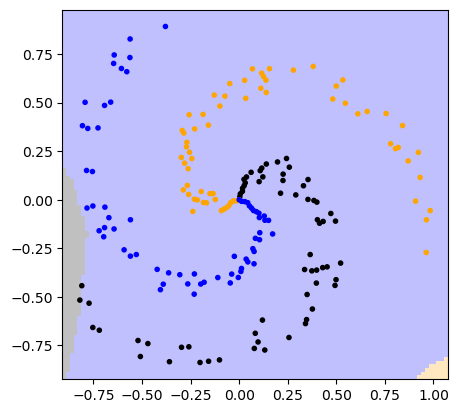

In [14]:
model = OneLayerNN(num_hidden = 32, rng_seed = 42)
# model(X).shape
plot_decision_region(model,X,y)

In [15]:
model = OneLayerNN(32,rng_seed=42)

ans1 = J_grads(model,X,y)
ans2 = J_grads_vec(model,X,y)

In [16]:
[ np.max( np.abs(x-y)) for x,y in zip(ans1,ans2)]

[0.0, 0.0, 6.661338147750939e-16, 0.0]

Total: 2.0314s | per-iter: 0.020314s | it/s: 49.2


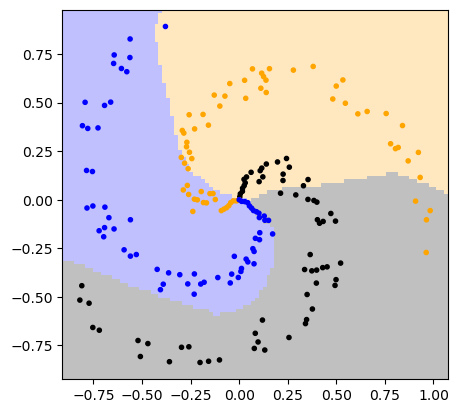

In [18]:
import time
model = OneLayerNN(32,rng_seed=42)

lr = 0.01
start = time.perf_counter()

for _ in range(1000):
    dJdW1, dJdb1, dJdW2, dJdb2 = J_grads(model, X, y)
    model.W1 -= lr * dJdW1
    model.b1 -= lr * dJdb1
    model.W2 -= lr * dJdW2
    model.b2 -= lr * dJdb2

elapsed = time.perf_counter() - start
print(f"Total: {elapsed:.4f}s | per-iter: {elapsed/100:.6f}s | it/s: {100/elapsed:.1f}")
plot_decision_region(model,X,y)
plt.savefig("onelayerNNfit.png")

Total: 0.1207s | per-iter: 0.001207s | it/s: 828.6


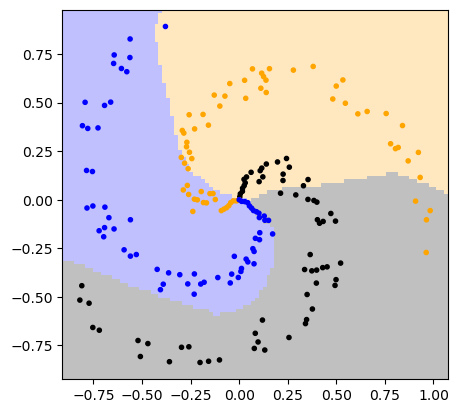

In [19]:
import time
model = OneLayerNN(32,rng_seed=42)

lr = 0.01
start = time.perf_counter()

for _ in range(1000):
    dJdW1, dJdb1, dJdW2, dJdb2 = J_grads_vec(model, X, y)
    model.W1 -= lr * dJdW1
    model.b1 -= lr * dJdb1
    model.W2 -= lr * dJdW2
    model.b2 -= lr * dJdb2

elapsed = time.perf_counter() - start
print(f"Total: {elapsed:.4f}s | per-iter: {elapsed/100:.6f}s | it/s: {100/elapsed:.1f}")
plot_decision_region(model,X,y)

In [12]:
ans1 = J_grads(model,X,y)
ans2 = J_grads_vec(model,X,y)
[ np.max( np.abs(x-y)) for x,y in zip(ans1,ans2)]

[0.043507944855968664, 0.0, 1.457167719820518e-16, 0.0]